In [1]:
# imports
import pymongo
import pandas as pd
import json
import pprint
import matplotlib.pyplot as plt

In [2]:
from pymongo import MongoClient

In [3]:
# set up client 
client = MongoClient()

In [4]:
db = client.food

In [5]:
print (db)

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'food')


In [6]:
# set collection to restaurant 
collection = db.rest

In [7]:
print (collection)

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'food'), 'rest')


In [8]:
# program to query Mongo programmatically
# American restaurants in Brooklyn with a score greater than 30
BrooklynAmericanRestaurantsOver30 = collection.find({"cuisine":"American","borough":"Brooklyn", "grades.0.score":{"$gt":30}})

In [9]:
# add all restaurants from previous query to a list
Restaurants = []
for x in BrooklynAmericanRestaurantsOver30:
    Restaurants.append(x)

In [10]:
# list of American restaurants in Brooklyn with a score greater than 30
Restaurants

[{'_id': ObjectId('62211e0487c5fc662953e1c1'),
  'address': {'building': '147',
   'coord': [-74.00070500000001, 40.660545],
   'street': '27 Street',
   'zipcode': '11232'},
  'borough': 'Brooklyn',
  'cuisine': 'American',
  'grades': [{'date': datetime.datetime(2014, 10, 22, 0, 0),
    'grade': 'C',
    'score': 31},
   {'date': datetime.datetime(2014, 5, 16, 0, 0), 'grade': 'A', 'score': 7},
   {'date': datetime.datetime(2013, 11, 20, 0, 0), 'grade': 'A', 'score': 7},
   {'date': datetime.datetime(2013, 4, 9, 0, 0), 'grade': 'B', 'score': 27},
   {'date': datetime.datetime(2012, 10, 18, 0, 0), 'grade': 'A', 'score': 13},
   {'date': datetime.datetime(2012, 5, 16, 0, 0), 'grade': 'B', 'score': 25}],
  'name': 'Quick Stop Restaurant',
  'restaurant_id': '40401019'},
 {'_id': ObjectId('62211e0487c5fc662953ea8c'),
  'address': {'building': '8801',
   'coord': [-74.0314075, 40.6218809],
   'street': '3 Avenue',
   'zipcode': '11209'},
  'borough': 'Brooklyn',
  'cuisine': 'American',
  

In [11]:
# length of list of restaurants
len(Restaurants)

17

In [12]:
# create dataframe from list of restaurants 
df_rest = pd.DataFrame(Restaurants)

In [13]:
# display restaurant dataframe
df_rest

,_id,address,borough,cuisine,grades,name,restaurant_id
0,62211e0487c5fc662953e1c1,"{'building': '147', 'coord': [-74.000705000000...",Brooklyn,American,"[{'date': 2014-10-22 00:00:00, 'grade': 'C', '...",Quick Stop Restaurant,40401019
1,62211e0487c5fc662953ea8c,"{'building': '8801', 'coord': [-74.0314075, 40...",Brooklyn,American,"[{'date': 2014-12-13 00:00:00, 'grade': 'Z', '...",Cebu,40859014
2,62211e0487c5fc662953fb84,"{'building': '108', 'coord': [-73.960308, 40.7...",Brooklyn,American,"[{'date': 2014-11-20 00:00:00, 'grade': 'C', '...",This & That,41294998
3,62211e0487c5fc66295401d9,"{'building': '6', 'coord': [-73.9809756, 40.68...",Brooklyn,American,"[{'date': 2014-10-09 00:00:00, 'grade': 'C', '...",Fulton Grill,41389547
4,62211e0487c5fc66295404d1,"{'building': '109', 'coord': [-73.9641287, 40....",Brooklyn,American,"[{'date': 2015-01-05 00:00:00, 'grade': 'Z', '...",Gordon Bennett,41427008
5,62211e0487c5fc6629540535,"{'building': '9522', 'coord': [-74.03155509999...",Brooklyn,American,"[{'date': 2015-01-02 00:00:00, 'grade': 'Z', '...",Energy Fuel,41431231
6,62211e0487c5fc6629540a2a,"{'building': '753', 'coord': [-73.9684436, 40....",Brooklyn,American,"[{'date': 2014-10-29 00:00:00, 'grade': 'C', '...",Georges Restaurant,41489694
7,62211e0487c5fc6629541e11,"{'building': '163', 'coord': [-73.9516337, 40....",Brooklyn,American,"[{'date': 2014-11-07 00:00:00, 'grade': 'Z', '...",Hope Garage,41683141
8,62211e0487c5fc6629541fe2,"{'building': '364', 'coord': [-73.986417, 40.6...",Brooklyn,American,"[{'date': 2014-05-22 00:00:00, 'grade': 'C', '...",Krescendo,41695265
9,62211e0487c5fc6629542012,"{'building': '274', 'coord': [-73.984480699999...",Brooklyn,American,"[{'date': 2014-08-20 00:00:00, 'grade': 'C', '...",Breuckelen Colony,41696147


In [14]:
# create list of scores from grades column 
# list of the scores of the 17 top American Restaurants in Brooklyn 
scores = []
i = 0
while i<17:
    scores.append(df_rest["grades"][i][0].get("score"))
    i = i + 1

In [15]:
# confirming there are 17 scores in list
len(scores)

17

In [16]:
scores

[31, 43, 32, 51, 35, 31, 40, 36, 35, 38, 39, 53, 31, 49, 41, 36, 40]

<BarContainer object of 17 artists>

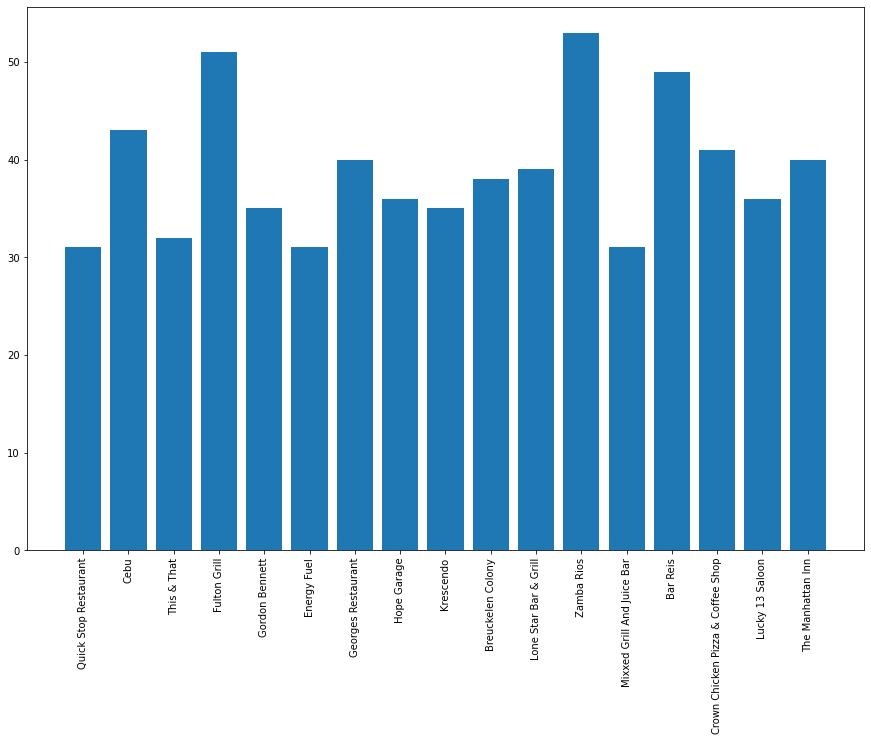

In [17]:
# ploting name of restaurant and score
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
plt.bar(df_rest["name"], scores)

The above graph visualizes the scores of the top 17 American restaurants located in the borough of Brooklyn in New York. This visualization reveals that there are about 3 or 4 American restaurants in Brooklyn with high scores that stand out from the rest. Futhermore, since this dataset is so large, being able to view a simple comparison of the scores of the top American restaurants in Brooklyn like this one reveals something that one wouldn't be able to see by looking at the raw dataset. Below I have included a similar graph that visualizes the scores top American Restaurants in Manhattan. I think these two graphs used together could be more helpful as someone can use them to compare the scores of the best American restaurants in these two boroughs. According to these 2 graphs, it looks like Manhattan has higher rating American restaurants than Brooklyn does. 

In [18]:
ManhattanAmericanRestaurantsOver30 = collection.find({"cuisine":"American","borough":"Manhattan", "grades.0.score":{"$gt":35}})



In [19]:
ManhattanRestaurants = []
for x in ManhattanAmericanRestaurantsOver30:
    ManhattanRestaurants.append(x)

In [20]:
len(ManhattanRestaurants)

35

In [21]:
df_rest_manhattan = pd.DataFrame(ManhattanRestaurants)

In [22]:
manhattan_scores = []
i = 0
while i<35:
    manhattan_scores.append(df_rest_manhattan["grades"][i][0].get("score"))
    i = i + 1

In [23]:
scores

[31, 43, 32, 51, 35, 31, 40, 36, 35, 38, 39, 53, 31, 49, 41, 36, 40]

In [24]:
len(manhattan_scores)

35

<BarContainer object of 35 artists>

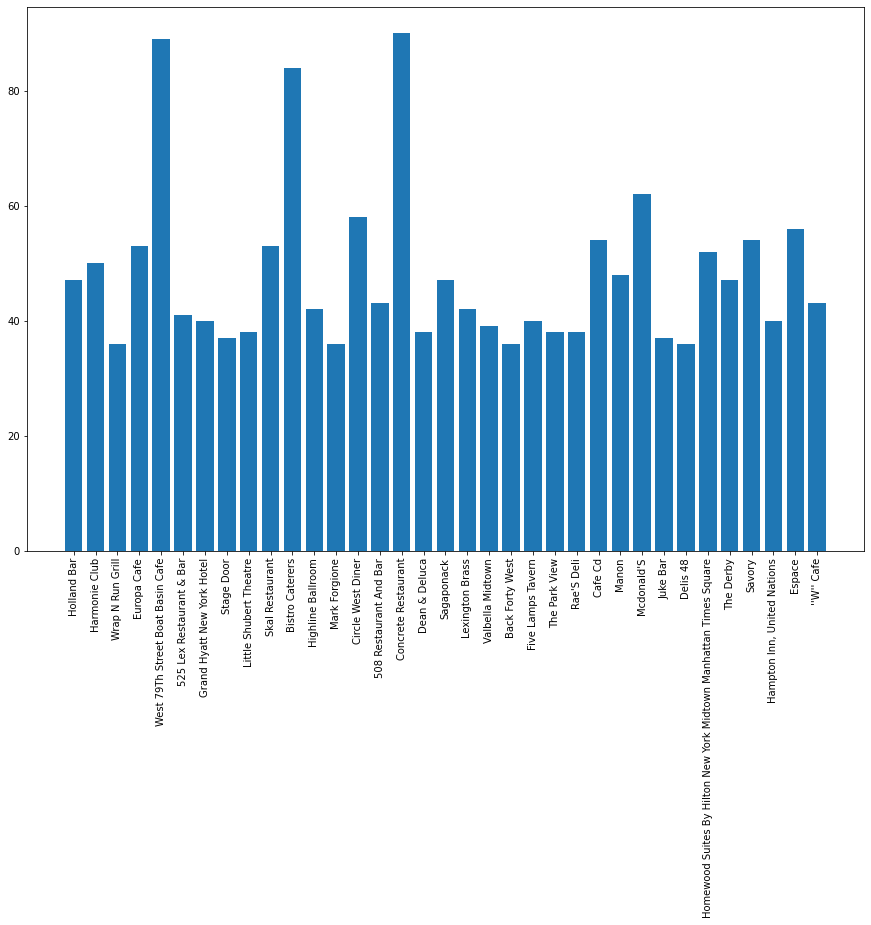

In [25]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
plt.bar(df_rest_manhattan["name"], manhattan_scores)